# Création de notre base d'images à traiter

Pour réaliser notre pansharpening, nous avons d'images N&B en bonne qualité ainsi que d'une image couleur en haute qualité.

## Création de notre set

Dans un premier temps nous allons créer nos propres images à partir d'images couleur à bonne résolution. Nous garderons une version N&B ainsi qu'une version couleur fortement dégradée. 

Pour l'instant les images auront éxactement le même calage.

## Set issu de satellites

Beaucoup de données de satellites sont libres d'accès, cependant, il n'est pas évident de trouver exactement ce dont nous avons besoin dans ces nombreuses données.

In [32]:
import matplotlib.pyplot as plt
import cv2

In [33]:
PATH = "../images/our-images/"

In [34]:
def bgr(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

In [35]:
def load_image(name):
    path = PATH + name
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize = (13, 13))
    plt.imshow(img)
    
    return img

(1367, 1312, 3)

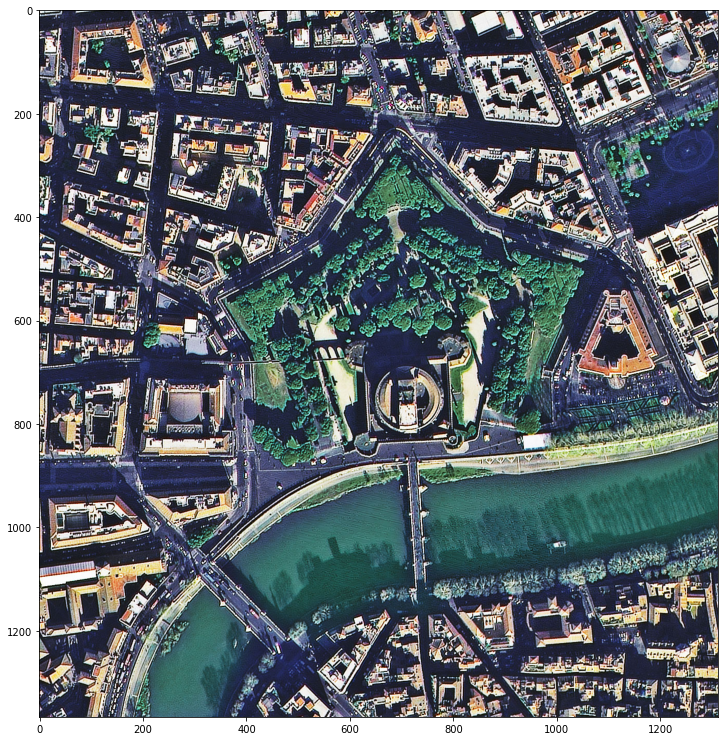

In [36]:
img = load_image("skyview.jpg")
img.shape

Recadrons l'image pour obtenir un multiple de 5. 
Cela permettra de diviser la résolution de l'image par 5 est de retomber sur celle-ci en multipliant par 5.

(1000, 1000, 3)

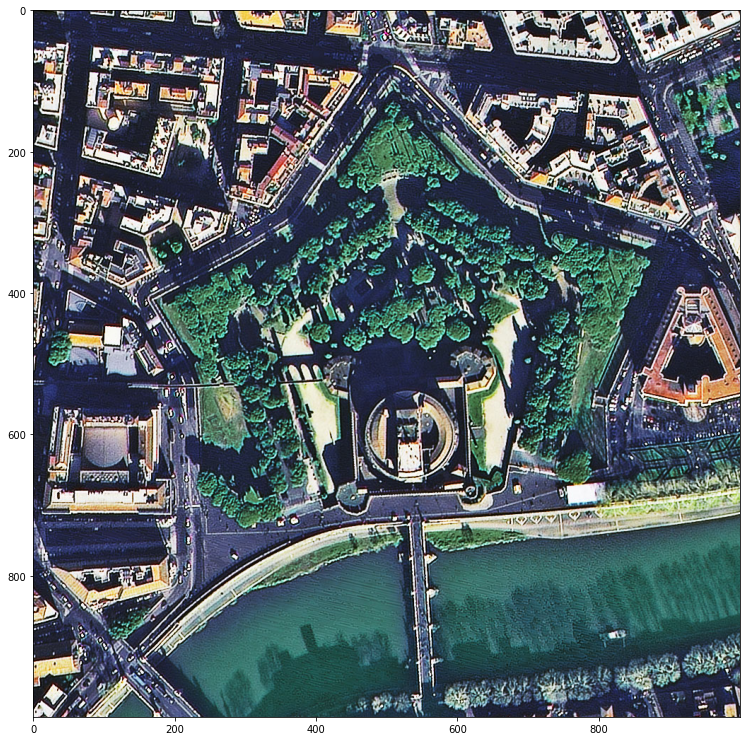

In [37]:
x = 180
y = 150
w = 1000
h = 1000
cropped_img = img[y:y+h, x:x+w]

plt.figure(figsize = (13, 13))
plt.imshow(cropped_img)
cropped_img.shape

In [38]:
# Use the cropped image from now on
img = cropped_img

(1000, 1000)

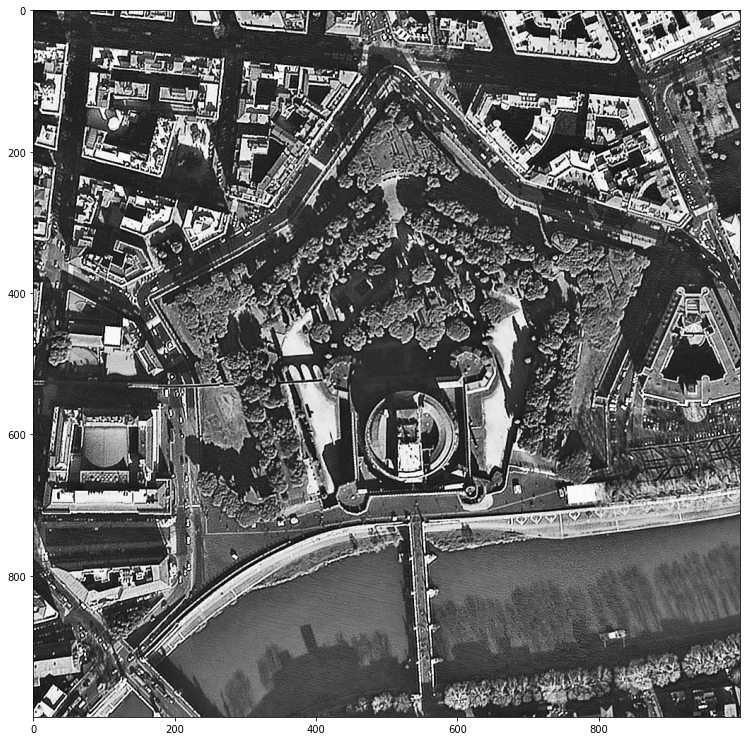

In [39]:
def to_black_and_white(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

bw = to_black_and_white(img)

plt.figure(figsize = (13, 13))
plt.imshow(bw, cmap="gray")
bw.shape

(200, 200, 3)

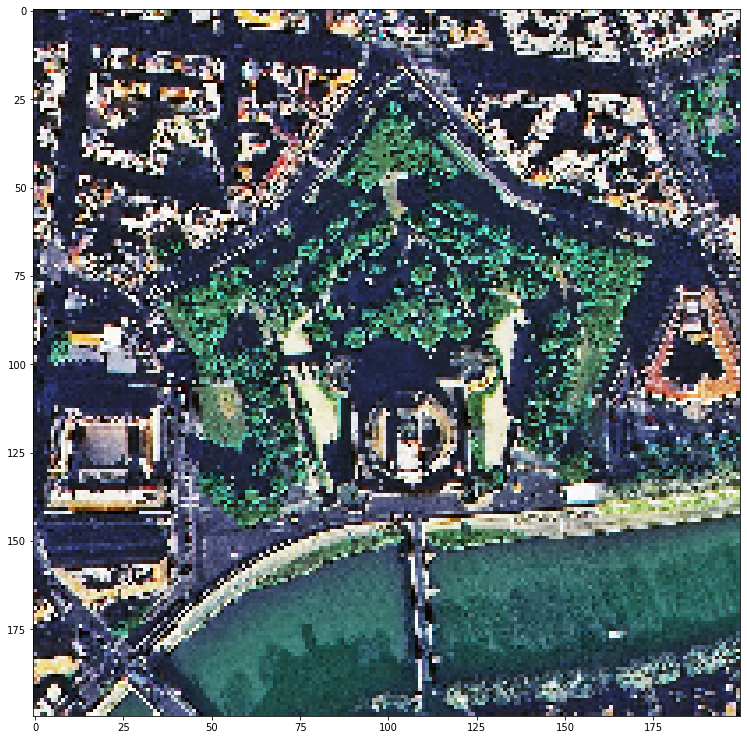

In [40]:
def down_sample(img, resolution):
    return cv2.resize(img, dsize=resolution)

ds = down_sample(img, (img.shape[1] // 5 , img.shape[0] // 5))

plt.figure(figsize = (13, 13))
plt.imshow(ds)
ds.shape

In [41]:
cv2.imwrite(PATH + "star-fort-cropped.jpg", bgr(cropped_img))
cv2.imwrite(PATH + "star-fort-bw.jpg", bw)
cv2.imwrite(PATH + "star-fort-ds.jpg", bgr(ds))

True